In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
# Data directories
train_dir = '/content/drive/MyDrive/Dataset/train'
test_dir = '/content/drive/MyDrive/Dataset/test'

img_height, img_width = 224, 224
batch_size = 32

In [ ]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Generating batches of training and testing data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# Displaying class indices
print('Class indices:', train_generator.class_indices)

Found 3070 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Class indices: {'City': 0, 'Nature': 1}


In [ ]:
# Using VGG16 convolutional base
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

for layer in base_model.layers:
    layer.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
# Model compilation
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14780481 (56.38 MB)
Trainable params: 65793 (257.00 KB)
Non-trainable params: 14714688 (56.13 MB)
__________

In [ ]:
# Training the model
ic_model = model.fit(train_generator,
                    epochs=6,
                    batch_size=batch_size,
                    validation_data=test_generator)

# Evaluating the model
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Epoch 1/6
96/96 [==============================] - 617s 6s/step - loss: 0.3313 - accuracy: 0.8704 - val_loss: 0.1387 - val_accuracy: 0.9600
Epoch 2/6
96/96 [==============================] - 57s 596ms/step - loss: 0.1611 - accuracy: 0.9466 - val_loss: 0.1176 - val_accuracy: 0.9650
Epoch 3/6
96/96 [==============================] - 57s 589ms/step - loss: 0.1435 - accuracy: 0.9498 - val_loss: 0.1086 - val_accuracy: 0.9650
Epoch 4/6
96/96 [==============================] - 57s 591ms/step - loss: 0.1254 - accuracy: 0.9570 - val_loss: 0.1035 - val_accuracy: 0.9650
Epoch 5/6
96/96 [==============================] - 57s 592ms/step - loss: 0.1222 - accuracy: 0.9573 - val_loss: 0.1023 - val_accuracy: 0.9667
Epoch 6/6
19/19 [==============================] - 3s 131ms/step - loss: 0.0988 - accuracy: 0.9683
Test accuracy: 0.9683333039283752


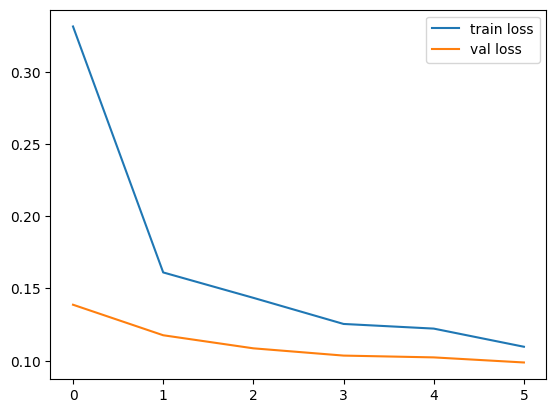

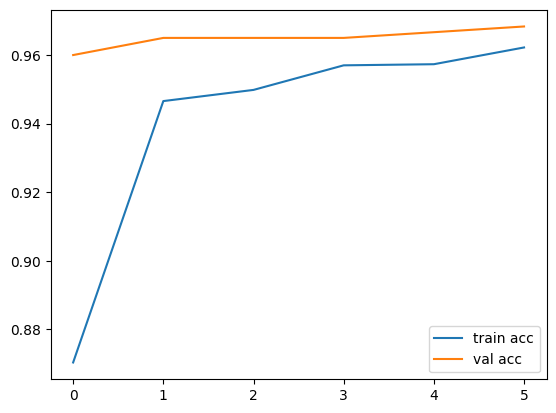

<Figure size 640x480 with 0 Axes>

In [ ]:
# plotting loss
plt.plot(ic_model.history['loss'], label='train loss')
plt.plot(ic_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plotting accuracy
plt.plot(ic_model.history['accuracy'], label='train acc')
plt.plot(ic_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save model as a h5 file
model.save('image_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
# Loading the model
model = load_model('/content/drive/MyDrive/Dataset/image_classification_model.h5')

In [30]:
# Loading and preprocessing the image for prediction
img = image.load_img("/content/drive/MyDrive/Dataset/download.jpeg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

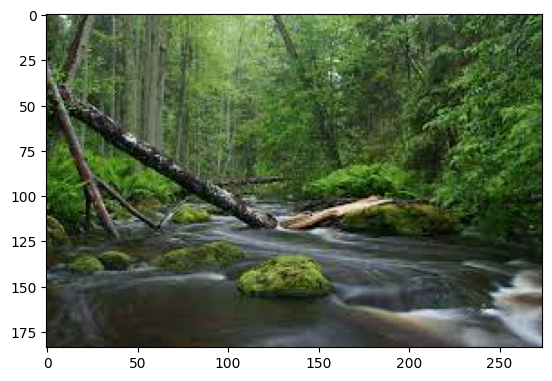

In [31]:
import matplotlib.pyplot as plt
image_path = '/content/drive/MyDrive/Dataset/download.jpeg'
image = plt.imread(image_path)
plt.imshow(image)
plt.show()

In [32]:
# Making prediction (Class indices: {'City': 0, 'Nature': 1})
prediction = model.predict(x)
if prediction[0][0] > 0.5:
  print("Nature")
else:
  print("City")

1/1 [==============================] - 0s 144ms/step
Nature
